# Implementation of Linear Hard Margin SVMs through CRNs

We shall be implementing linear hard margin SVMs using CRNs

In [2]:
# Format of notebook:
# Give a diagram and explaination of the network
# importing libraries
# defining the helper function
# training
# plotting
# testing
# plotting 


In [ ]:
# Give Diagram and explaination of the network

In [3]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [13]:
# helper functions

# defining the various functions
# oscillator function
# load
# sum
# product
# comparison ratio
# approximate majority

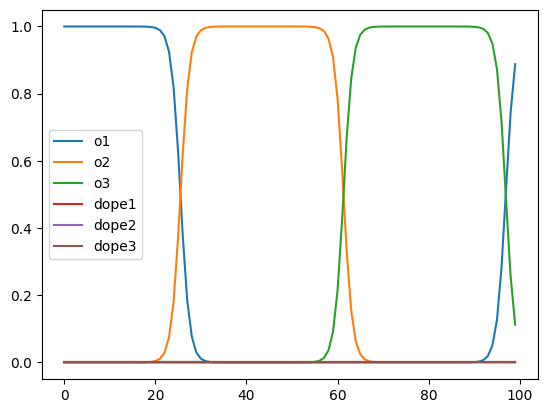

In [34]:
# oscillator wrapper function takes in an array of oscillating species names, array of doped species, current timestep
# a dictionary containing all the species concentrations, and an output dictionary for current timestep

def oscillator_function(y,t,num_oscillating_species):
    # making the array of the oscillating species
    oscillating_species = y[0:num_oscillating_species]
    doped_species = y[num_oscillating_species:]

    num_doped_species = len(doped_species)

    # initialisinng the derivatives
    d_oscillating_species = np.zeros(num_oscillating_species)
    d_doped_species = np.zeros(num_doped_species)

    # defining the derivatives 

    # for the oscillating species
    d_oscillating_species[0] = -oscillating_species[0]*oscillating_species[1] + oscillating_species[num_oscillating_species-1]*oscillating_species[0] + doped_species[0]*oscillating_species[num_oscillating_species-1] - doped_species[1]*oscillating_species[0]

    for idx in range(1,num_oscillating_species-1):
        d_oscillating_species[idx] = oscillating_species[idx-1]*oscillating_species[idx] - oscillating_species[idx+1]*oscillating_species[idx] + doped_species[idx]*oscillating_species[idx-1] - doped_species[idx+1]*oscillating_species[idx]
    
    d_oscillating_species[num_oscillating_species-1] = oscillating_species[num_oscillating_species-2]*oscillating_species[num_oscillating_species-1] - oscillating_species[0]*oscillating_species[num_oscillating_species-1] + doped_species[num_doped_species-1]*oscillating_species[num_oscillating_species-2] - doped_species[0]*oscillating_species[num_oscillating_species-1]

    # for the doped species
    d_doped_species[0] = -doped_species[0]*oscillating_species[num_doped_species-1]

    for idx in range(1,num_doped_species):
        d_doped_species[idx] = -doped_species[idx]*oscillating_species[idx-1]
    
    dydt = []
    dydt.extend(d_oscillating_species)
    dydt.extend(d_doped_species)
    
    return dydt

def oscillator_wrapper(oscillating_species, doped_species, current_timestep, species_concentrations, species_concentrations_current_timestep):
    
    # making an array of the species concentrations at timestep: current_timestep - 1
    oscillating_species_concentrations = np.array([species_concentrations[species][current_timestep - 1] for species in oscillating_species])
    doped_species_concentrations = np.array([species_concentrations[species][current_timestep - 1] for species in doped_species])

    # number of oscillating species 
    num_oscillating_species = len(oscillating_species_concentrations)

    # making the input array for the oscillator function
    y_0 = []
    y_0.extend(oscillating_species_concentrations)
    y_0.extend(doped_species_concentrations)

    # calculating the time range
    t = np.linspace(current_timestep - 1, current_timestep, 2) # 2 steps

    # solving the ODE
    sol = odeint(oscillator_function, y_0, t, args=(num_oscillating_species,))

    # updating the species concentrations in current timestep
    for idx, species in enumerate(oscillating_species):
        species_concentrations_current_timestep[species] = sol[1][idx]

    for idx, species in enumerate(doped_species):
        species_concentrations_current_timestep[species] = sol[1][num_oscillating_species + idx]

    return species_concentrations_current_timestep


# # trying out this function
# osc = ['o1', 'o2','o3']
# dop = ['dope1', 'dope2', 'dope3']

# d = 10 **(-15)
# species_concentrations = {
#     'o1': [1],
#     'o2': [0],
#     'o3': [0],
#     'dope1': [d],
#     'dope2': [d],
#     'dope3': [d]
# }


# for t in range(1, 100):
#     # Get updated concentrations for the current timestep
#     updated_concentrations = oscillator_wrapper(osc, dop, t, species_concentrations, {})
    
#     # Update the species_concentrations dictionary with the new concentrations
#     for species in updated_concentrations:
#         species_concentrations[species].append(updated_concentrations[species])

# # print(species_concentrations)

# # plotting the  species in the species_concentrations dictionary
# for species in species_concentrations:
#     plt.plot(species_concentrations[species], label=species)

# plt.legend()
# plt.show()


In [21]:
myDict = {}
 
# Adding list as value
myDict["key1"] = [1, 2]
 
# creating a list
lst = ['Geeks', 'For', 'Geeks']
 
# Adding this list as sublist in myDict
print(type(myDict["key1"]))
myDict["key1"].append(lst)
 
print(myDict)

<class 'list'>
{'key1': [1, 2, ['Geeks', 'For', 'Geeks']]}


In [11]:
# # oscillator function
# # Takes in the current state of the oscillating species & doped_species for them and returns the new state of the oscillating species

# def oscillating_func(osc, dope):
#     y_0 = []

#     num_species = len(osc)
#     y_0.extend(osc)
#     y_0.extend(dope)

#     t = np.linspace(10,11,2)

#     def oscillate(y,t, num_species):
#         O_t = y[0:num_species]
#         d_o_T = y[num_species:]

#         num_species = len(osc)

#         # defining the parameters
#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
            

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt =[]
#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t)

#         return dydt
    
#     sol = odeint(oscillate, y_0 ,t, args=(num_species,))
#     # sol = oscillate(y_0, t,num_species)
#     # print(sol)

#     # sol1 = y_0 + sol



#     O = []
#     D = []

#     for i in range(num_species):
#         O.append(sol[:,i][-1])
#         D.append(sol[:,i+num_species][-1])

#     return O ,D

# osc = [1,0,0,0]
# d = 10**(-15)
# dope = [d,d,d,d]

# O = []
# D = []


# for i in range(100):
#     osc, dope = oscillating_func(osc, dope)  
#     O.append(osc)
#     D.append(dope)  

# plt.plot(O)
# plt.show()





In [10]:
# Questions to ask:
# 1. We need to ensure that every module finishes in its first oscillation (i think)
# 2. as doing odeint for basically 1 step, do  i really need to do it? can simply do x_t = x_t-1 + dxdt?

# Things to do:
# 1. formalise the notebook, by adding markdowns
